<a href="https://colab.research.google.com/github/skbhere/Simple-forecast-predicion-for-Covid-19-/blob/master/00_India_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import datetime

In [6]:
df=pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')

In [7]:
first = datetime.date(2020, 1, 30)
leng =len(df)
date_ = [first + datetime.timedelta(days=x) for x in range(leng)]
Day = np.arange(1,(leng+1),1)
date_ = pd.to_datetime(date_,utc=None)
df["Date"] = date_
df["Day"] = Day
df0=df
v=len(df) -1
df=df.head(v)
df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Day
0,2020-01-30,1,1,0,0,0,0,1
1,2020-01-31,0,1,0,0,0,0,2
2,2020-02-01,0,1,0,0,0,0,3
3,2020-02-02,1,2,0,0,0,0,4
4,2020-02-03,1,3,0,0,0,0,5


In [8]:
#df = df.drop(['Date','Total Confirmed','Daily Recovered', 'Total Recovered','Daily Deceased','Daily Confirmed'], axis=1)

In [9]:
#df=df.tail(6)
df1=df.tail(11)
df2=df.tail(20)
df3=df.tail(10)

In [10]:
Y1 = np.log(df1['Total Confirmed'])
Y1 = np.array(Y1)
Y2 = np.log(df1['Total Recovered'])
Y2 = np.array(Y2)
Y3 = np.log(df1['Total Deceased'])
Y3 = np.array(Y3)
X1 = np.array(df1['Day'])
X2 = np.array(df2['Day'])
X = np.array(df3['Day'])
#Y4 = np.array(df2['Daily Confirmed'])
Y4 =np.log(df2['Daily Confirmed'])
Y4 = np.array(Y4)
Y5 =np.log(df2['Daily Recovered'])
Y5 = np.array(Y5)
Y6 =np.log(df2['Daily Deceased'])
Y6 = np.array(Y6)


In [11]:
from sklearn.linear_model import LinearRegression
X1=X1.reshape(-1, 1)
X2=X2.reshape(-1, 1)
Y1=Y1.reshape(-1, 1)
Y2=Y2.reshape(-1, 1)
Y3=Y3.reshape(-1, 1)
Y4=Y4.reshape(-1, 1)
Y5=Y5.reshape(-1, 1)
Y6=Y6.reshape(-1, 1)

reg1 = LinearRegression().fit(X1, Y1)
reg2 = LinearRegression().fit(X1, Y2)
reg3 = LinearRegression().fit(X1, Y3)
reg4 = LinearRegression().fit(X2, Y4)
reg5 = LinearRegression().fit(X2, Y5)
reg6 = LinearRegression().fit(X2, Y6)

logb1 = reg1.coef_
loga1 = reg1.intercept_
a1 = np.exp(loga1)
b1 = np.exp(logb1)

logb2 = reg2.coef_
loga2 = reg2.intercept_
a2 = np.exp(loga2)
b2 = np.exp(logb2)

logb3 = reg3.coef_
loga3 = reg3.intercept_
a3 = np.exp(loga3)
b3 = np.exp(logb3)

logb4 = reg4.coef_
loga4 = reg4.intercept_
a4 = np.exp(loga4)
b4 = np.exp(logb4)

logb5 = reg5.coef_
loga5 = reg5.intercept_
a5 = np.exp(loga5)
b5 = np.exp(logb5)

logb6 = reg6.coef_
loga6 = reg6.intercept_
a6 = np.exp(loga6)
b6 = np.exp(logb6)
#print("Based on Last 20 Days Data")
#print ("Total Confirmed Accuracy", reg1.score(X1, Y1)*100)
print ("coefficient of determination for Total Confirmed", reg1.score(X1, Y1)*100)
print ("coefficient of determination for Total Recovered ", reg2.score(X1, Y2)*100)
print ("coefficient of determination for Total Deceased ", reg3.score(X1, Y3)*100)
print("coefficient of determination for Based on Last 30 Days Data")
print ("coefficient of determination for Daily Confirmed ", reg4.score(X2, Y4)*100)
print ("coefficient of determination for Daily Recovered ", reg5.score(X2, Y5)*100)
print ("coefficient of determination for Daily Deceased ", reg6.score(X2, Y6)*100)

coefficient of determination for Total Confirmed 99.99333350233385
coefficient of determination for Total Recovered  99.85764775028207
coefficient of determination for Total Deceased  99.99106104147693
coefficient of determination for Based on Last 30 Days Data
coefficient of determination for Daily Confirmed  92.26704335885726
coefficient of determination for Daily Recovered  72.02119558815659
coefficient of determination for Daily Deceased  60.47709052510803


In [20]:
drange = 31
start =len(df) +1
dval = np.arange(start,start+drange,1)
dval= np.array(dval)
val= dval
dval=dval.reshape(-1, 1)
print(dval.shape)
import datetime
base = datetime.date.today() - datetime.timedelta(days=1)
date_list = [base + datetime.timedelta(days=x) for x in range(drange)]
date_list = pd.to_datetime(date_list,utc=None)

DConfirmed = np.round_(np.multiply(a4,(np.power(b4,val))))
TConfirmed = np.round_(np.multiply(a1,(np.power(b1,val))))
#TConfirmed = np.round_(reg1.predict(dval))
DRecovered = np.round_(np.multiply(a5,(np.power(b5,val))))
TRecovered = np.round_(np.multiply(a2,(np.power(b2,val))))
#TRecovered = np.round_(reg2.predict(dval))
DDeceased = np.round_(np.multiply(a6,(np.power(b6,val))))
TDeceased = np.round_(np.multiply(a3,(np.power(b3,val))))
#TDeceased = np.round_(reg3.predict(dval))


DConfirmed= DConfirmed.flatten()
TConfirmed= TConfirmed.flatten()
i = 1
while i < len(TConfirmed):
    DConfirmed[i]=TConfirmed[i]-TConfirmed[i-1]
    i += 1

dict = {
   'Date' : date_list,
       'Daily Confirmed': DConfirmed.flatten(), 
        'Total Confirmed': TConfirmed.flatten(), 
  #      'Daily Recovered': DRecovered.flatten() ,
  #      'Total Recovered': TRecovered.flatten(),
 #       'Daily Deceased' : DDeceased.flatten(),
       # 'Total Deceased' : TDeceased.flatten(),
        'Day' : dval.flatten() ,
       } 
final = pd.DataFrame(dict) 


(31, 1)


In [21]:
df0.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Day
164,2020-07-12,29106,879472,18198,554430,500,23189,165
165,2020-07-13,28178,907650,17683,572113,541,23730,166
166,2020-07-14,29917,937567,20977,593090,587,24317,167
167,2020-07-15,32607,970174,20646,613736,614,24931,168
168,2020-07-16,35468,1005642,22867,636603,680,25611,169


In [22]:
final.tail(31)

,Date,Daily Confirmed,Total Confirmed,Day
0,2020-07-16,31982.0,1002525.0,169
1,2020-07-17,33690.0,1036215.0,170
2,2020-07-18,34823.0,1071038.0,171
3,2020-07-19,35993.0,1107031.0,172
4,2020-07-20,37203.0,1144234.0,173
5,2020-07-21,38453.0,1182687.0,174
6,2020-07-22,39745.0,1222432.0,175
7,2020-07-23,41081.0,1263513.0,176
8,2020-07-24,42462.0,1305975.0,177
9,2020-07-25,43888.0,1349863.0,178


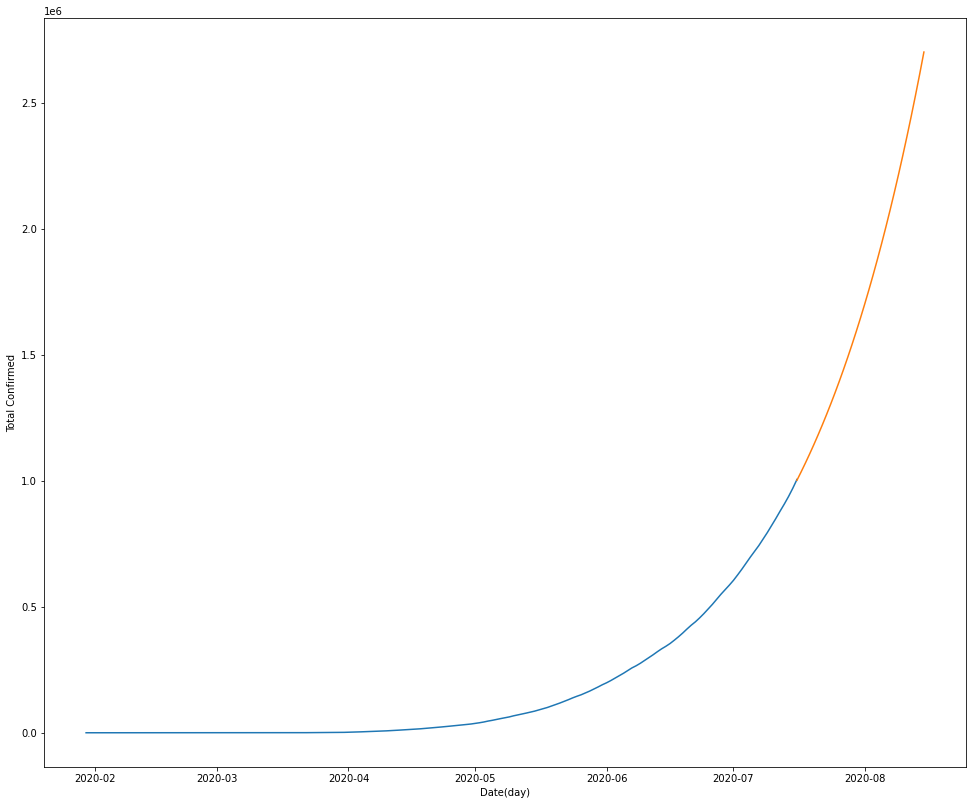

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(16,13))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = df0['Date']
position =df0['Total Confirmed']

time1 = final['Date']
position1 = final['Total Confirmed']
axes.plot(time, position)
axes.plot(time1, position1)

plt.xlabel('Date(day)')
plt.ylabel('Total Confirmed')
fig.savefig('INDIA_Total.png')

In [16]:
#save to Csv
final.to_csv("predict.csv")
pr=pd.read_csv('predict.csv')
pr.head()

,Unnamed: 0,Date,Total Confirmed,Total Deceased,Day
0,0,2020-07-16,1002525.0,25485.0,169
1,1,2020-07-17,1036215.0,26088.0,170
2,2,2020-07-18,1071038.0,26705.0,171
3,3,2020-07-19,1107031.0,27337.0,172
4,4,2020-07-20,1144234.0,27984.0,173
